In [1]:
import numpy as np
import pystan 
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = np.load("xy_data.npy")

In [4]:
x = data[0]
y = data[1]

In [5]:
Data = {'x' : list(x), 'y': list(y), 'N' : data.shape[1]}

In [6]:
lr = """
data {
  int<lower = 1> N;
  real x[N];
  real y[N];
}
parameters {
  real a;
  real b;
  real sigma;
}
model {
  for (i in 1:N){
      y[i] ~ normal(a + b*x[i], sigma);
  }
  a ~ normal(0,100);
  b ~ normal(0,100);
  sigma ~ normal(0,1000); 
}
"""

sm = pystan.StanModel(model_code=lr)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bf74ed49489a5b93cb32e8de00b6b220 NOW.


In [7]:
markov = """
data {
    int<lower=1> n;
    real r[n];
    real sigma_1;
    }
parametrs {
  real b_0;
    real b_1;
    real eps[n-1];
    real omega;
    real betta;
    real alpha;
    }
    
transformed_parameters {
    real sigma[n];
    sigma[1] = sigma_1
    for(i in 2:n){
        sigma[i] = sqrt(omega + betta*(pow(sigma[i-1],2)) + alpha*(pow(sigma[i-1],2)*(pow(eps[i-1],2))))
        }
    for(i in 1:n){
        eps[i] = (r[i+1] - b_0 - b_1*r[i])/ sigma[i]
    }
    }
model {
    sigma[1] ~ normal(0,1000);
    for(i in 2:n){
        pow(sigma[i],2) ~ normal(omega + betta*pow(sigma[i-1],2),alpha*pow(sigma[i-1],2))
    }
    for(i in 1:n){
        r[i] ~ normal(b_0 + b_1*r[i-1],pow(sigma[i-1],2))
    }
    
    }

}
"""

In [8]:
    fit = sm.sampling(data=Data, iter=1000, chains=5)

C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


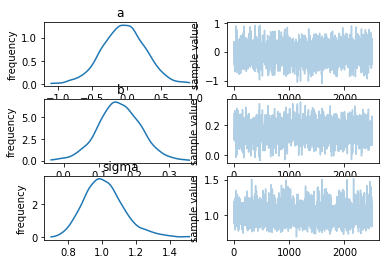

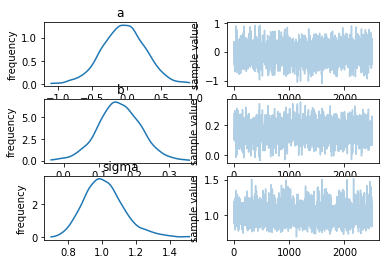

In [9]:
fit.plot()

In [10]:
A = fit.extract()["a"]
B = fit.extract()["b"]
a = A.mean()
b = B.mean()
print(a,b)

-0.04499901906897344 0.15818496396417583


In [12]:
linear = LinearRegression()
linear.fit(x.reshape(-1,1),y)
linear.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [15]:
a_linear = linear.__dict__["intercept_"]
b_linear = float(linear.__dict__["coef_"])
print(a_linear, b_linear)

-0.05589383574820739 0.16133082500854035


In [11]:
m_1 = a + b*x.min()
m_2 = a + b*x.max()

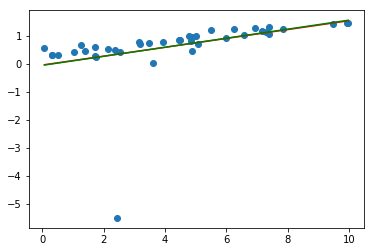

In [14]:
plt.scatter(x, y)
plt.plot([x.min(),x.max()],[m_1,m_2], c ="r")
plt.plot([x.min(),x.max()],[a_linear+b_linear*x.min(),a_linear+b_linear*x.max()],c="g")

In [11]:
markov = """
data {
    int<lower=1> n;
    real r[n];
    real sigma_1;
    }
parametrs {
  real b_0;
    real b_1;
    real eps[n-1];
    real omega;
    real betta;
    real alpha;
    }
    
transformed_parameters {
    real sigma[n];
    sigma[1] = sigma_1
    for(i in 2:n){
        sigma[i] = sqrt(omega + betta*(pow(sigma[i-1],2)) + alpha*(pow(sigma[i-1],2)*(pow(eps[i-1],2))))
        }
    for(i in 1:n){
        eps[i] = (r[i+1] - b_0 - b_1*r[i])/ sigma[i]
    }
    }
model {
    sigma[1] ~ normal(0,1000);
    for(i in 2:n){
        pow(sigma[i],2) ~ normal(omega + betta*pow(sigma[i-1],2),alpha*pow(sigma[i-1],2))
    }
    for(i in 1:n){
        r[i] ~ normal(b_0 + b_1*r[i-1],pow(sigma[i-1],2))
    }
    
    }

"""



In [14]:
markov_sm = pystan.StanModel(model_code=markov)

ValueError: Failed to parse Stan model 'anon_model_44b511558841cdc6b6c48228bb1d6e85'. Error message:
PARSER EXPECTED: whitespace to end of file.
FOUND AT line 7: 
parametrs {
  real b_0;
    real b_1;
    real eps[n-1];
    real omega;
    real betta;
    real alpha;
    }
    
transformed_parameters {
    real sigma[n];
    sigma[1] = sigma_1
    for(i in 2:n){
        sigma[i] = sqrt(omega + betta*(pow(sigma[i-1],2)) + alpha*(pow(sigma[i-1],2)*(pow(eps[i-1],2))))
        }
    for(i in 1:n){
        eps[i] = (r[i+1] - b_0 - b_1*r[i])/ sigma[i]
    }
    }
model {
    sigma[1] ~ normal(0,1000);
    for(i in 2:n){
        pow(sigma[i],2) ~ normal(omega + betta*pow(sigma[i-1],2),alpha*pow(sigma[i-1],2))
    }
    for(i in 1:n){
        r[i] ~ normal(b_0 + b_1*r[i-1],pow(sigma[i-1],2))
    }
    
    }

}




